## 1. Preparing data for network

In [ ]:
# installing some graph visualizing libraries
!pip install pyvis
!pip install nxviz

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp
import numpy as np
from random import randint
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from pyvis.network import Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df = pd.read_csv('/content/drive/My Drive/Laws_22.05.2022.csv',decimal=",")

In [6]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
del new_header

In [7]:
laws = df[df['Номер, наименование'].str.contains("в архиве")]

In [8]:
legislators = pd.read_csv('/content/drive/My Drive/legislators.csv',decimal=",")

In [9]:
legislators

,Unnamed: 0,Name,Faction,Comittee,Comission
0,0,Х.М.Абакаров,ЕДИНАЯ РОССИЯ,Комитет Государственной Думы по молодежной пол...,NaN
1,1,М.Ю.Авдеев,КПРФ,Комитет Государственной Думы по строительству ...,['Комиссия Государственной Думы Федерального С...
2,2,С.В.Авксентьева,НОВЫЕ ЛЮДИ,Комитет Государственной Думы по региональной п...,['Комиссия Государственной Думы Федерального С...
3,3,Б.В.Агаев,ЕДИНАЯ РОССИЯ,"Комитет Государственной Думы по экологии, прир...",NaN
4,4,Р.А.Азимов,ЕДИНАЯ РОССИЯ,Комитет Государственной Думы по безопасности и...,NaN
...,...,...,...,...,...
444,444,А.Ф.Ягафаров,ЕДИНАЯ РОССИЯ,"Комитет Государственной Думы по экологии, прир...",NaN
445,445,А.В.Якубовский,ЕДИНАЯ РОССИЯ,Комитет Государственной Думы по строительству ...,['Комиссия Государственной Думы Федерального С...
446,446,Е.А.Ямпольская,ЕДИНАЯ РОССИЯ,Комитет Государственной Думы по культуре,NaN
447,447,И.А.Яровая,ЕДИНАЯ РОССИЯ,NaN,NaN


In [10]:
legislators_matrix = pd.DataFrame(  columns = legislators.Name, 
                                    index=legislators.Name)

In [13]:
legislators_matrix = legislators_matrix.fillna(0)

In [15]:
for name1 in legislators_matrix.index:
    for name2 in legislators_matrix.index:
        for entity in laws['СПЗИ']:
            if (name1 in entity) and (name2 in entity):
                legislators_matrix.loc[name1][name2] += 1

In [16]:
non_empty = legislators_matrix.loc[~(legislators_matrix==0).all(axis=1)]
non_empty = non_empty.loc[:,~(non_empty==0).all(axis=0)]

In [17]:
np.fill_diagonal(non_empty.values, 0)

In [18]:
non_empty

Name,С.В.Авксентьева,А.Г.Аксаков,И.А.Ананских,А.А.Аникеев,О.Н.Ануфриева,Н.В.Арефьев,Р.А.Баталова,К.М.Бахарев,М.Н.Берулава,Н.Р.Будуев,...,А.М.Хамитов,Н.Г.Цед,А.В.Чепа,Б.А.Чернышов,С.А.Шаргунов,Ю.Н.Швыткин,Г.В.Шилкин,А.В.Шипулин,А.М.Шолохов,Е.А.Ямпольская
Name,,,,,,,,,,,,,,,,,,,,,
С.В.Авксентьева,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
А.Г.Аксаков,0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
И.А.Ананских,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
А.А.Аникеев,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
О.Н.Ануфриева,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ю.Н.Швыткин,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Г.В.Шилкин,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
А.В.Шипулин,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 2. Building the graph

In [21]:
G = nx.from_numpy_matrix(non_empty.values)

labels = non_empty.columns.values
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

In [22]:
g = nx.from_numpy_matrix(np.array(non_empty))

In [23]:
from IPython.core.display import display, HTML

In [24]:
nt=Network(height='2000px',
           width='100%',
           bgcolor='#222222', 
           font_color='white', 
           notebook=True)

In [25]:
scale=10 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

In [26]:
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

In [27]:
nt.barnes_hut()

In [28]:
nt.from_nx(G)

In [30]:
nt.show_buttons(filter_=['nodes','physics'])
nt.show('nx.html')
display(HTML('nx.html'))

## Statistics

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

* PageRank check

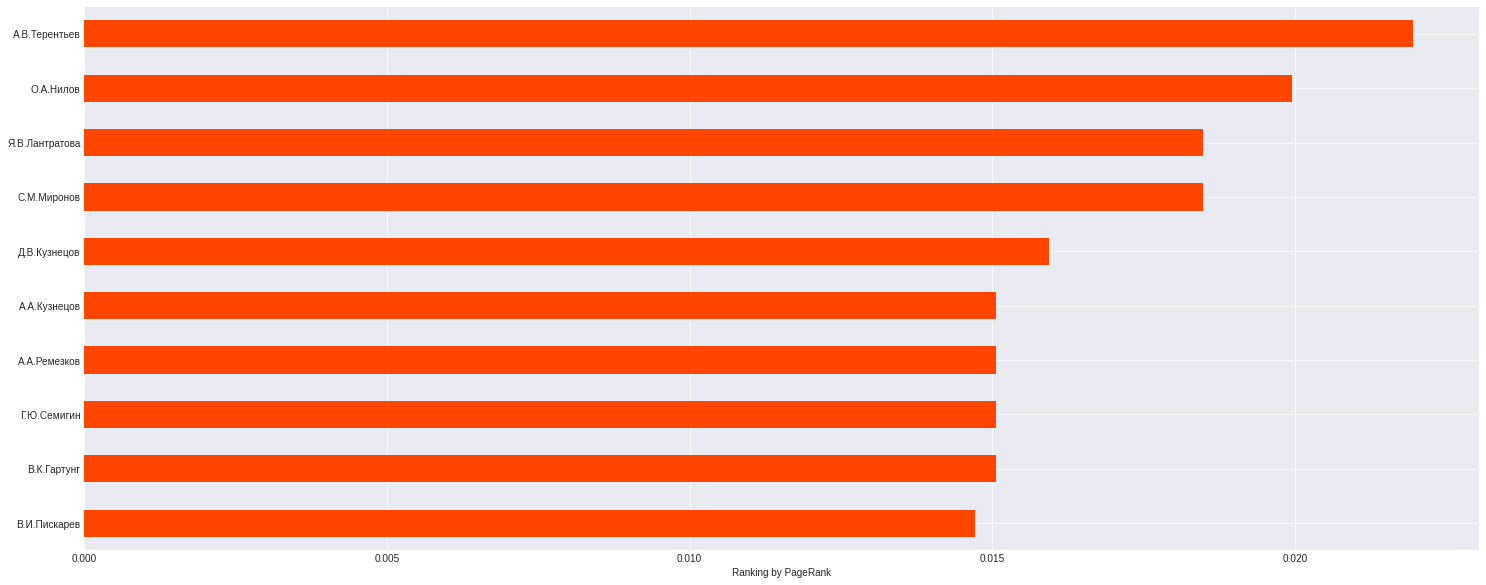

In [52]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(25,10))
between = pd.Series(nx.pagerank(G)).sort_values()
between.tail(10).plot(kind="barh", color='orangered')

ax.set_xlabel('Ranking by PageRank')
plt.show()

* Degree centrality check

In [53]:
import matplotlib.colors as mcolors

In [57]:
deg_centrality = nx.degree_centrality(G)

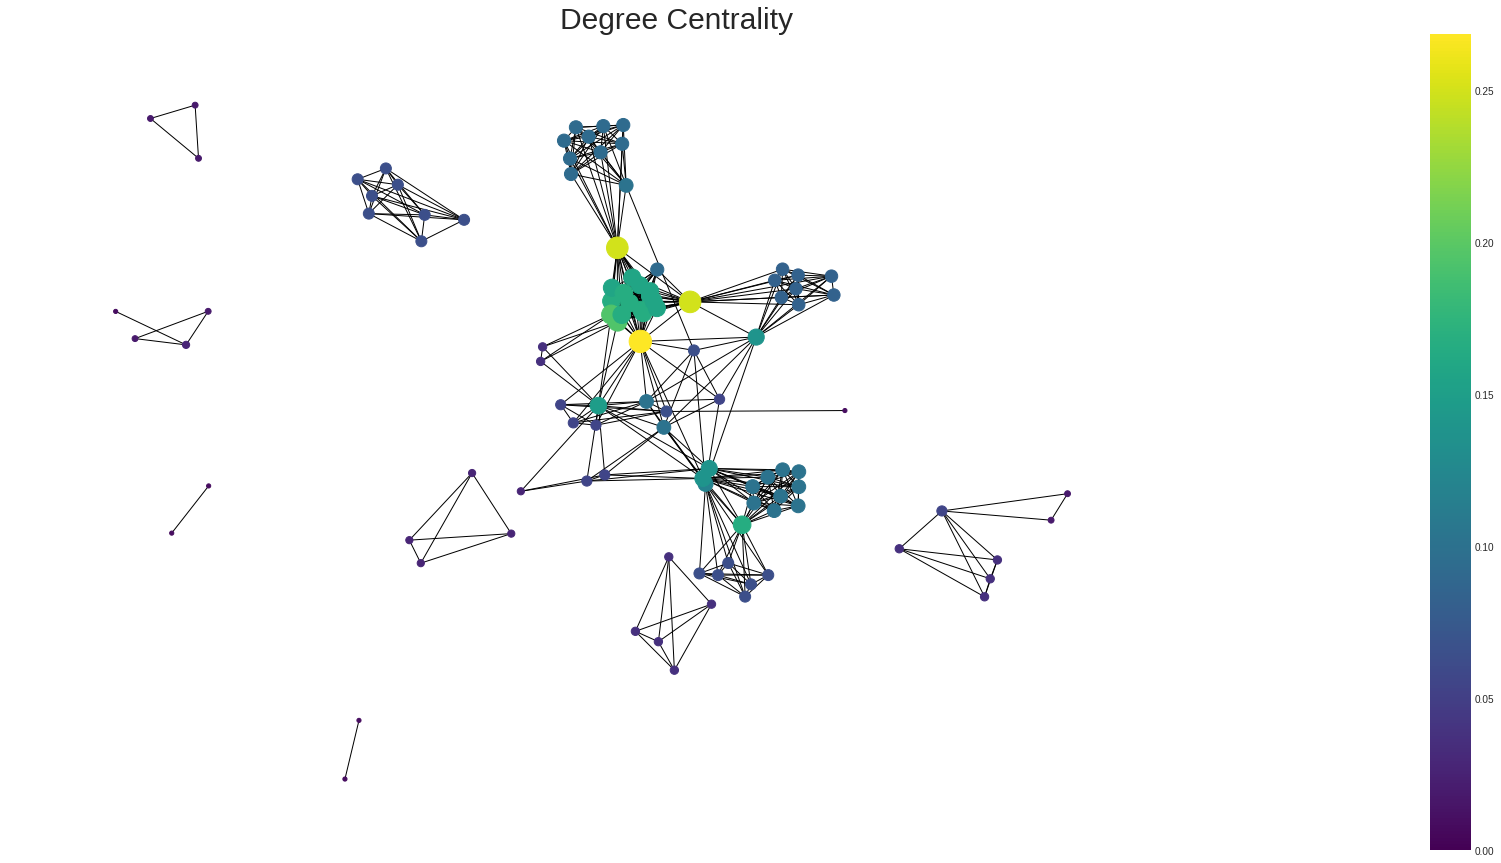

In [58]:
cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 500
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

fig, ax = plt.subplots(figsize=(30, 15))
plt.title('Degree Centrality', fontdict ={'size': 30}, loc='center') 
plt.colorbar(scalarmappaple)
nx.draw(G, pos, node_size=sizes, node_color=sizes, cmap=colormap)

* Betweenness centrality check

In [59]:
bet_centrality = nx.betweenness_centrality(G)

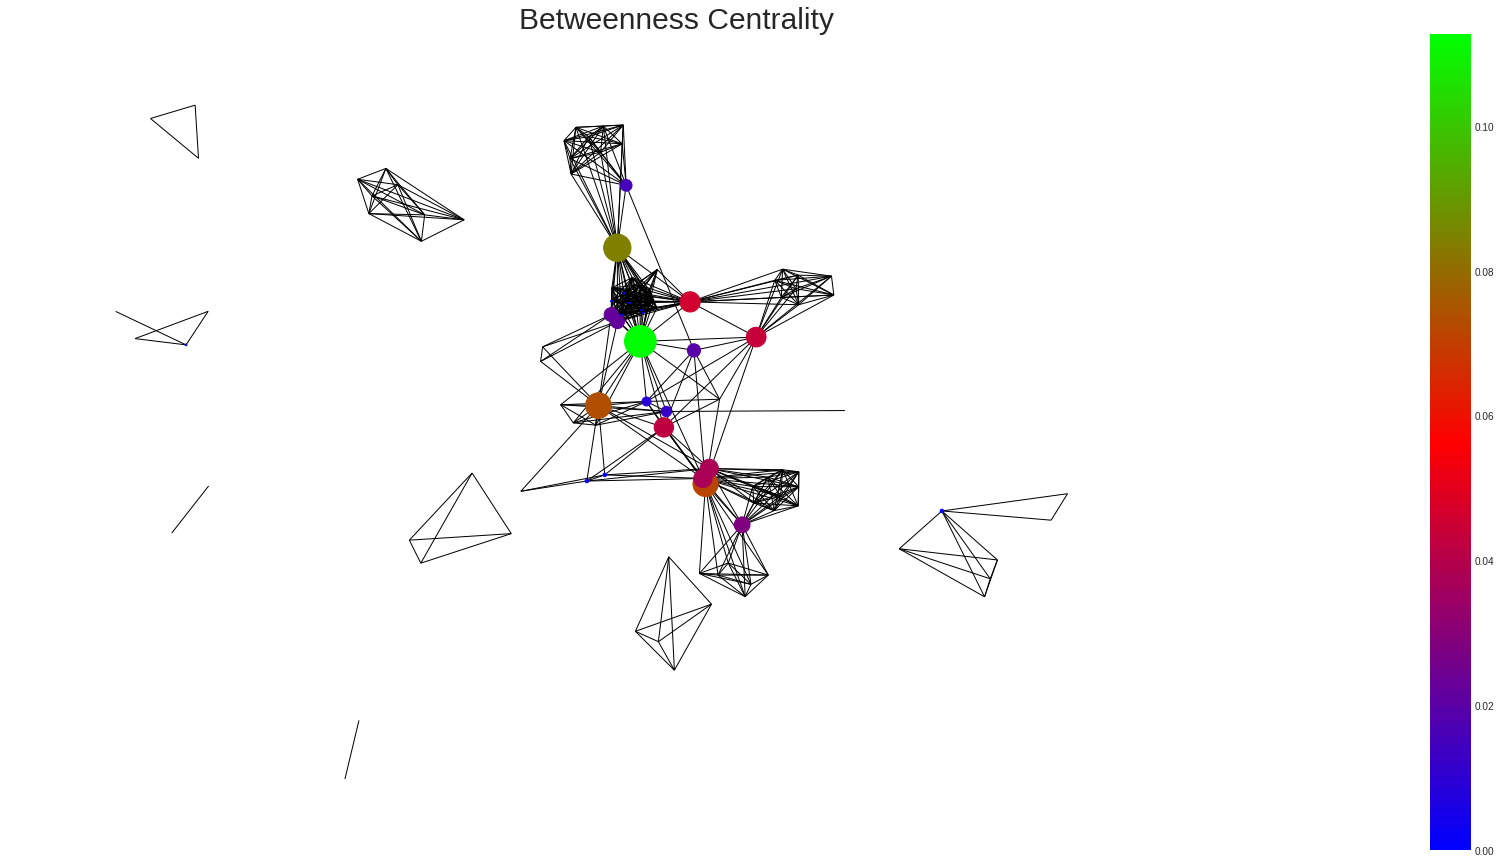

In [60]:
cent = np.fromiter(bet_centrality.values(), float)
sizes = cent / np.max(cent) * 1000
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.brg

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

fig, ax = plt.subplots(figsize=(30, 15))
plt.title('Betweenness Centrality', fontdict ={'size': 30}, loc='center') 
plt.colorbar(scalarmappaple)
nx.draw(G, pos, node_size=sizes, node_color=sizes, cmap=colormap)

## 3. Link prediction with node2vec

In [62]:
!pip install node2vec
import node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=29c88f7c9fb1ba9551b6193f3dd5ed7c898d38d6bc01c32f1f70a6df01f002f9
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [63]:
def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape
    
def mask_test_edges(adj, test_frac=.1, val_frac=.05, prevent_disconnect=True, verbose=False):
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.

    if verbose == True:
        print('preprocessing...')

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    g = nx.from_scipy_sparse_matrix(adj)
    orig_num_cc = nx.number_connected_components(g)

    adj_triu = sp.triu(adj) # upper triangular portion of adj matrix
    adj_tuple = sparse_to_tuple(adj_triu) # (coords, values, shape), edges only 1 way
    edges = adj_tuple[0] # all edges, listed only once (not 2 ways)
    # edges_all = sparse_to_tuple(adj)[0] # ALL edges (includes both ways)
    num_test = int(np.floor(edges.shape[0] * test_frac)) # controls how large the test set should be
    num_val = int(np.floor(edges.shape[0] * val_frac)) # controls how alrge the validation set should be

    # Store edges in list of ordered tuples (node1, node2) where node1 < node2
    edge_tuples = [(min(edge[0], edge[1]), max(edge[0], edge[1])) for edge in edges]
    all_edge_tuples = set(edge_tuples)
    train_edges = set(edge_tuples) # initialize train_edges to have all edges
    test_edges = set()
    val_edges = set()

    if verbose == True:
        print('generating test/val sets...')

    # Iterate over shuffled edges, add to train/val sets
    np.random.shuffle(edge_tuples)
    for edge in edge_tuples:
        # print(edge)
        node1 = edge[0]
        node2 = edge[1]

        # If removing edge would disconnect a connected component, backtrack and move on
        g.remove_edge(node1, node2)
        if prevent_disconnect == True:
            if nx.number_connected_components(g) > orig_num_cc:
                g.add_edge(node1, node2)
                continue

        # Fill test_edges first
        if len(test_edges) < num_test:
            test_edges.add(edge)
            train_edges.remove(edge)

        # Then, fill val_edges
        elif len(val_edges) < num_val:
            val_edges.add(edge)
            train_edges.remove(edge)

        # Both edge lists full --> break loop
        elif len(test_edges) == num_test and len(val_edges) == num_val:
            break

    if (len(val_edges) < num_val or len(test_edges) < num_test):
        print("WARNING: not enough removable edges to perform full train-test split!")
        print("Num. (test, val) edges requested: (", num_test, ", ", num_val, ")")
        print("Num. (test, val) edges returned: (", len(test_edges), ", ", len(val_edges), ")")

    if prevent_disconnect == True:
        assert nx.number_connected_components(g) == orig_num_cc

    if verbose == True:
        print('creating false test edges...')

    test_edges_false = set()
    while len(test_edges_false) < num_test:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge not an actual edge, and not a repeat
        if false_edge in all_edge_tuples:
            continue
        if false_edge in test_edges_false:
            continue

        test_edges_false.add(false_edge)

    if verbose == True:
        print('creating false val edges...')

    val_edges_false = set()
    while len(val_edges_false) < num_val:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false:
            continue
            
        val_edges_false.add(false_edge)

    if verbose == True:
        print('creating false train edges...')

    train_edges_false = set()
    while len(train_edges_false) < len(train_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, 
            # not in val_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false or \
            false_edge in train_edges_false:
            continue

        train_edges_false.add(false_edge)

    if verbose == True:
        print('final checks for disjointness...')

    # assert: false_edges are actually false (not in all_edge_tuples)
    assert test_edges_false.isdisjoint(all_edge_tuples)
    assert val_edges_false.isdisjoint(all_edge_tuples)
    assert train_edges_false.isdisjoint(all_edge_tuples)

    # assert: test, val, train false edges disjoint
    assert test_edges_false.isdisjoint(val_edges_false)
    assert test_edges_false.isdisjoint(train_edges_false)
    assert val_edges_false.isdisjoint(train_edges_false)

    # assert: test, val, train positive edges disjoint
    assert val_edges.isdisjoint(train_edges)
    assert test_edges.isdisjoint(train_edges)
    assert val_edges.isdisjoint(test_edges)

    if verbose == True:
        print('creating adj_train...')

    # Re-build adj matrix using remaining graph
    adj_train = nx.adjacency_matrix(g)

    # Convert edge-lists to numpy arrays
    train_edges = np.array([list(edge_tuple) for edge_tuple in train_edges])
    train_edges_false = np.array([list(edge_tuple) for edge_tuple in train_edges_false])
    val_edges = np.array([list(edge_tuple) for edge_tuple in val_edges])
    val_edges_false = np.array([list(edge_tuple) for edge_tuple in val_edges_false])
    test_edges = np.array([list(edge_tuple) for edge_tuple in test_edges])
    test_edges_false = np.array([list(edge_tuple) for edge_tuple in test_edges_false])

    if verbose == True:
        print('Done with train-test split!')
        print('')

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, train_edges_false, \
        val_edges, val_edges_false, test_edges, test_edges_false


### Train/test

In [64]:
np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(g)

# Perform train-test split
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, \
    test_edges, test_edges_false = mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

In [65]:
# Inspect train/test split
print("Total nodes:", adj_sparse.shape[0])
print("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print("Training edges (positive):", len(train_edges))
print("Training edges (negative):", len(train_edges_false))
print("Validation edges (positive):", len(val_edges))
print("Validation edges (negative):", len(val_edges_false))
print("Test edges (positive):", len(test_edges))
print("Test edges (negative):", len(test_edges_false))

Total nodes: 109
Total edges: 492
Training edges (positive): 296
Training edges (negative): 296
Validation edges (positive): 49
Validation edges (negative): 49
Test edges (positive): 147
Test edges (negative): 147


### Train Node2vec (Learn Node Embeddings)

In [66]:
import node2vec
from node2vec import Node2Vec
from gensim.models import Word2Vec

In [67]:
# node2vec settings
# NOTE: When p = q = 1, this is equivalent to DeepWalk

P = 1 # Return hyperparameter
Q = 1 # In-out hyperparameter
WINDOW_SIZE = 10 # Context size for optimization
NUM_WALKS = 10 # Number of walks per source
WALK_LENGTH = 80 # Length of walk per source
DIMENSIONS = 128 # Embedding dimension
DIRECTED = False # Graph directed/undirected
WORKERS = 8 # Num. parallel workers
ITER = 3 # SGD epochs

In [68]:
node2vec = Node2Vec(g_train, dimensions=DIMENSIONS, walk_length=WALK_LENGTH, num_walks=NUM_WALKS, workers=WORKERS, temp_folder="/mnt")
model = node2vec.fit(window=WINDOW_SIZE, min_count=1)

Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]




Generating walks (CPU: 7):   0%|          | 0/1 [00:00<?, ?it/s]

Generating walks (CPU: 4):   0%|          | 0/1 [00:00<?, ?it/s]



Generating walks (CPU: 2):   0%|          | 0/2 [00:00<?, ?it/s]




Generating walks (CPU: 5):   0%|          | 0/1 [00:00<?, ?it/s]





Generating walks (CPU: 1):   0%|          | 0/2 [00:00<?, ?it/s]






Generating walks (CPU: 3): 100%|██████████| 1/1 [00:07<00:00,  7.67s/it]




Generating walks (CPU: 2): 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]





Generating walks (CPU: 2): 100%|██████████| 2/2 [00:09<00:00,  4.56s/it]


In [69]:
model.wv.save_word2vec_format("vk")
emb_mappings = model.wv

### Create Edge Embeddings

In [70]:
# Create node embeddings matrix (rows = nodes, columns = embedding features)
emb_list = []
for node_index in range(0, adj_sparse.shape[0]):
    node_str = str(node_index)
    node_emb = emb_mappings[node_str]
    emb_list.append(node_emb)
emb_matrix = np.vstack(emb_list)

In [71]:
# Generate bootstrapped edge embeddings (as is done in node2vec paper)
# Edge embedding for (v1, v2) = hadamard product of node embeddings for v1, v2
def get_edge_embeddings(edge_list):
    embs = []
    for edge in edge_list:
        node1 = edge[0]
        node2 = edge[1]
        emb1 = emb_matrix[node1]
        emb2 = emb_matrix[node2]
        edge_emb = np.multiply(emb1, emb2)
        embs.append(edge_emb)
    embs = np.array(embs)
    return embs

In [72]:
# Train-set edge embeddings
pos_train_edge_embs = get_edge_embeddings(train_edges)
neg_train_edge_embs = get_edge_embeddings(train_edges_false)
train_edge_embs = np.concatenate([pos_train_edge_embs, neg_train_edge_embs])

# Create train-set edge labels: 1 = real edge, 0 = false edge
train_edge_labels = np.concatenate([np.ones(len(train_edges)), np.zeros(len(train_edges_false))])

# Val-set edge embeddings, labels
pos_val_edge_embs = get_edge_embeddings(val_edges)
neg_val_edge_embs = get_edge_embeddings(val_edges_false)
val_edge_embs = np.concatenate([pos_val_edge_embs, neg_val_edge_embs])
val_edge_labels = np.concatenate([np.ones(len(val_edges)), np.zeros(len(val_edges_false))])

# Test-set edge embeddings, labels
pos_test_edge_embs = get_edge_embeddings(test_edges)
neg_test_edge_embs = get_edge_embeddings(test_edges_false)
test_edge_embs = np.concatenate([pos_test_edge_embs, neg_test_edge_embs])

# Create val-set edge labels: 1 = real edge, 0 = false edge
test_edge_labels = np.concatenate([np.ones(len(test_edges)), np.zeros(len(test_edges_false))])

### Evaluate Edge Embeddings

In [73]:
# Train logistic regression classifier on train-set edge embeddings
from sklearn.linear_model import LogisticRegression
edge_classifier = LogisticRegression(random_state=0)
edge_classifier.fit(train_edge_embs, train_edge_labels)

LogisticRegression(random_state=0)

In [74]:
# Predicted edge scores: probability of being of class "1" (real edge)
val_preds = edge_classifier.predict_proba(val_edge_embs)[:, 1]
val_roc = roc_auc_score(val_edge_labels, val_preds)
val_ap = average_precision_score(val_edge_labels, val_preds)

In [75]:
# Predicted edge scores: probability of being of class "1" (real edge)
test_preds = edge_classifier.predict_proba(test_edge_embs)[:, 1]
test_roc = roc_auc_score(test_edge_labels, test_preds)
test_ap = average_precision_score(test_edge_labels, test_preds)

In [76]:
print('node2vec Validation ROC score: ', str(val_roc))
print('node2vec Validation AP score: ', str(val_ap))
print('node2vec Test ROC score: ', str(test_roc))
print('node2vec Test AP score: ', str(test_ap))

node2vec Validation ROC score:  0.9941690962099126
node2vec Validation AP score:  0.9944113903313314
node2vec Test ROC score:  0.9828312277291869
node2vec Test AP score:  0.9844706064110786


### ROC curve visualization

In [ ]:
!pip install scikit-plot

In [78]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [79]:
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score,confusion_matrix

In [80]:
false_positive_rate,true_positive_rate,_ = roc_curve(test_edge_labels, test_preds)

Text(0, 0.5, 'True Positive Rate')

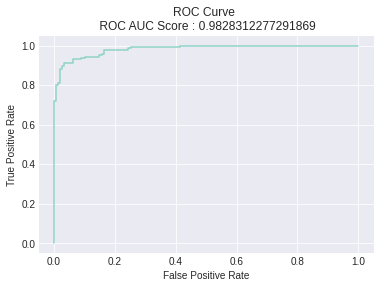

In [81]:
plt.plot(false_positive_rate,true_positive_rate)
plt.title(f'ROC Curve \n ROC AUC Score : {test_roc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')